# Section IIIC plots

Run first 2 code section, first one is all packages needed and second 

In [1]:
using PyPlot, LinearAlgebra, JuMP, Ipopt, Statistics, RandomMatrices, Permutations, RollingFunctions

In [5]:
include("SIIIC_code.jl");
include("SIIIC_plots.jl");

In [3]:
x_init = [0.5;0.5]
A = [0.5 0.5; 0.5 0.5]
B = [1 0; 0 1] 

x1_hat = 0.8 #Goal for player 1
x2_hat = 0.1 #Goal for player 2

targets = [x1_hat 0; 0 x2_hat]

γ = [0.01; 0.01] #Cost for each player

K_f = 20; #Time for the plot

p_flag = 0; #Projection flag
perm_flag = 0; #Perm flag
x_os, u_os, x_plot = COD_OSA_GS_2a(x_init,targets,γ,K_f,A,B,p_flag,perm_flag);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



In [4]:
save = 0; #If save = 1, figure will be saved by name "GS_2a_plot"
plot_2a_2p(x_os, save)

In [6]:
save = 0; #If save = 1, figure will be saved by name "GS_2a_scatter"
scatter_plot(x_plot,save)

In [146]:
x_init = [0;0;0]
A = [0.2 0.4 0.4; 0.1 0.4 0.5; 0.4 0.4 0.2]
B = [1 0 0; 0 1 0; 0 0 0]

x1_hat = 0.8
x2_hat = 0.1

targets = [x1_hat 0; 0 x2_hat; 0 0]

γ = [0.01; 0.01]

K_f = 20;

p_flag = 0; #Projection flag
perm_flag = 0 ; #Perm flag
#last digit is model: 1 - DeGroot; 2 - FJ; 3 - HK
x_os, u_os, x_plot = COD_OSA_GS_2a(x_init,targets,γ,K_f,A,B,p_flag,perm_flag);


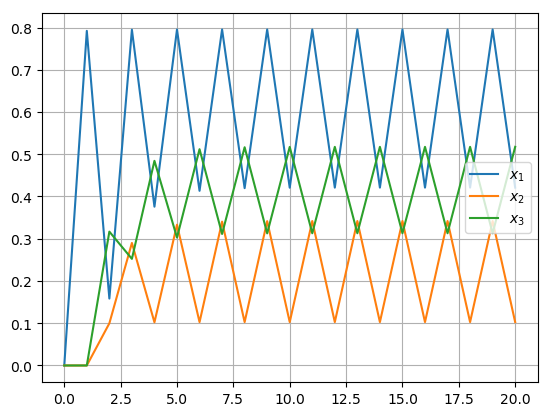

In [153]:
plot(x_plot')
legend([L"x_1",L"x_2",L"x_3"], loc = "right")
grid()

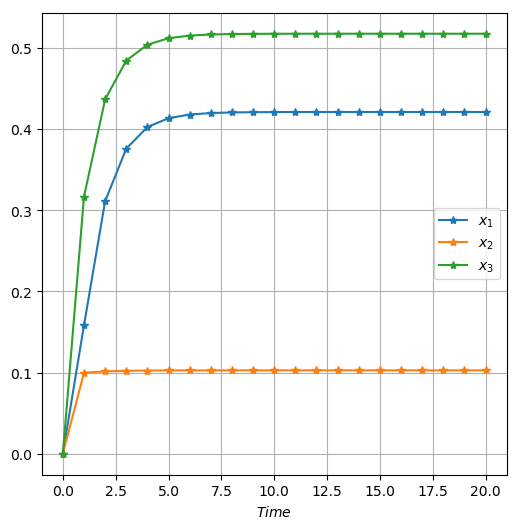

PyObject Text(0.5, 25.0, '$Time$')

In [150]:
figure(figsize=(6,6))
grid()
plot(x_os', "*-")
legend([L"x_1",L"x_2",L"x_3"], loc = "right")
xlabel(L"Time")

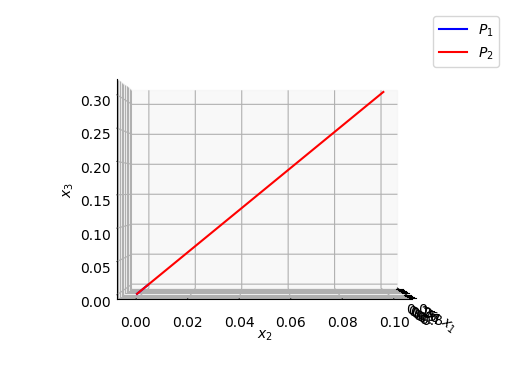

PyObject <matplotlib.legend.Legend object at 0x7f6768dcc630>

In [194]:
ax = gca(projection="3d")
for i in 1:2
    k = string("$i")
    if iseven(i) == true 
        PyPlot.plot3D(x_plot[1,i:i+1]',x_plot[2,i:i+1]', x_plot[3,i:i+1]', "-k", color = "red")
    else
        PyPlot.plot3D(x_plot[1,i:i+1]',x_plot[2,i:i+1]', x_plot[3,i:i+1]', "-k", color = "blue")
    end
end
xlabel(L"x_1"); ylabel(L"x_2"); zlabel(L"x_3")

ax[:view_init](0, 0)
grid()
legend([L"P_1", L"P_2"])

In [16]:
Acl = ((I(size(A,2))-(1/(B[:,1]'*B[:,1] + γ[1]))*(B[:,1]*B[:,1]'))*A)*((I(size(A,2))-(1/(B[:,2]'*B[:,2] + γ[2]))*(B[:,2]*B[:,2]'))*A)

eig = eigvals(Acl)
radius = maximum(abs.(eig))

0.2549750024507401